<a href="https://colab.research.google.com/github/Inspiring2su/Django-Website/blob/main/EcoTrack_Drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [ ]:
!nvidia-smi

Mon Jan 13 06:30:33 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Libraries

* `opencv-python`: A popular library for computer vision tasks.
* `ultralytics`: A library for implementing YOLO (You Only Look Once) models for object detection.
* `roboflow`: A platform for managing datasets and model training.
* `tensorflow`: A deep learning framework.
* `squarify`: A library for creating treemaps.

In [ ]:
# Install required libraries
!pip install opencv-python ultralytics
!pip install -q roboflow tensorflow squarify ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00


* `os`: For interacting with the operating system, like file paths.
* `shutil`: For high-level file operations.
* `numpy`: For numerical operations and handling arrays.
* `pandas`: For data manipulation and analysis, particularly with DataFrames.
* `matplotlib.pyplot` and `seaborn`: For data visualization.
* `random`: For generating random numbers or select random images.
* `cv2`: OpenCV for image processing.
* `yaml`: For reading YAML files, often used for configuration.
* `Image`: From PIL (Python Imaging Library) for image handling.
* `deque`: A double-ended queue, useful for maintaining a fixed-size list.
* `YOLO`: The YOLO model class for object detection.
* `Video`: For displaying video in Jupyter notebooks.
* `Roboflow`: For accessing datasets and models from the Roboflow platform.
* `ImageDataGenerator`: For augmenting image data during training.
* `tensorflow`: The deep learning framework.
* `mpimg`: For reading images using Matplotlib.
* `squarify`: For creating treemaps.

In [ ]:
# Import various libraries that will be used throughout the notebook
import os
HOME = os.getcwd()
print(HOME)
import shutil
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video
from roboflow import Roboflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as mpimg
import squarify
from google.colab.patches import cv2_imshow

/content
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Set up paths
HOME = os.getcwd()
labels_path = '/content/-desertification-4/train/labels'
custom_image_dir = '/content/-desertification-4/valid/images'

# Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install -U ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


# Install the Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AV9dOXoKKeH8bfeebg1g")
project = rf.workspace("desertification").project("desertification")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to -desertification-4 in yolov8:: 100%|██████████| 2422/2422 [00:02<00:00, 872.56it/s]


# Data Explorization

In [ ]:
import os

labels_path = '/content/-desertification-4/train/labels'
print(os.listdir(labels_path))

['istockphoto-1338065300-640_adpp_is_mp4-0053_jpg.rf.f7e33bc893fde0e31bf46655d9c498e2.txt', 'istockphoto-2152682109-640_adpp_is_mp4-0093_jpg.rf.b78927d4ec09f8da0e2e87d0b4f8a2cf.txt', 'istockphoto-2154124816-640_adpp_is_mp4-0064_jpg.rf.60ebf24abe61c3b94eefb06db3805616.txt', 'istockphoto-1489718144-640_adpp_is_mp4-0037_jpg.rf.e1cff3da97977e311e53d1ef630f02f1.txt', 'istockphoto-1338065300-640_adpp_is_mp4-0077_jpg.rf.eccd5e62ac5b077b6155fc44d8e58c97.txt', 'istockphoto-1489718144-640_adpp_is_mp4-0014_jpg.rf.162859649ba39f32b6a748e6442a0edb.txt', 'istockphoto-1338065300-640_adpp_is_mp4-0085_jpg.rf.e6cefbb6a1a938b352a541b66ea8bcdb.txt', 'istockphoto-2152682248-640_adpp_is_mp4-0034_jpg.rf.37e41305189c6e03087652c91dc0d6bd.txt', 'istockphoto-2148066690-640_adpp_is_mp4-0105_jpg.rf.d86afb7f5af5858ba36d308c505afb7d.txt', 'istockphoto-2152682248-640_adpp_is_mp4-0037_jpg.rf.c7ddc8c858914ff0cb1d9f3c6bdcee75.txt', 'istockphoto-2096051140-640_adpp_is_mp4-0078_jpg.rf.fb15a3bf3e38bfb48fb3c034f27bc4af.txt'

In [ ]:
# List all text files in the labels directory
files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
dataframes = []  # Initialize the list for DataFrames

# Read each label file and append its DataFrame to the list
for file in files:
    file_path = os.path.join(labels_path, file)
    df = pd.read_csv(file_path, header=None)  # Assuming no header in text files
    dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)
print("Columns in DataFrame:", combined_df.columns.tolist())
print(combined_df.head())

Columns in DataFrame: [0]
                              0
0  0 0.5 0.77421875 1 0.4515625
1                 0 0.5 0.5 1 1
2  0 0.5 0.66953125 1 0.6609375
3   0 0.5 0.565625 1 0.86796875
4  0 0.5 0.77265625 1 0.4546875


In [ ]:
def desert_detect(img_path):
    try:
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Image at {img_path} could not be read.")

        detect_result = model(img)  # Ensure model is defined and loaded
        detect_img = detect_result[0].plot()
        detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
        return detect_img
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return np.zeros((640, 640, 3), dtype=np.uint8)  # Return a blank image in case of error

In [ ]:
# Load the YOLO model
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 90.0MB/s]


In [ ]:
# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

In [ ]:
# Select 12 random images from the list
selected_images = random.sample(image_files, 12)


0: 640x640 (no detections), 25.1ms
Speed: 7.9ms preprocess, 25.1ms inference, 127.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 36.3ms
Speed: 3.2ms preprocess, 36.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 14.2ms
Speed: 2.7ms preprocess, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.6ms
Speed: 2.7ms preprocess, 10.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.0ms
Speed: 3.0ms preprocess, 10.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 51.0ms
Speed: 12.5ms preprocess, 51.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 23.0ms
Speed: 2.6ms preprocess, 23.0m

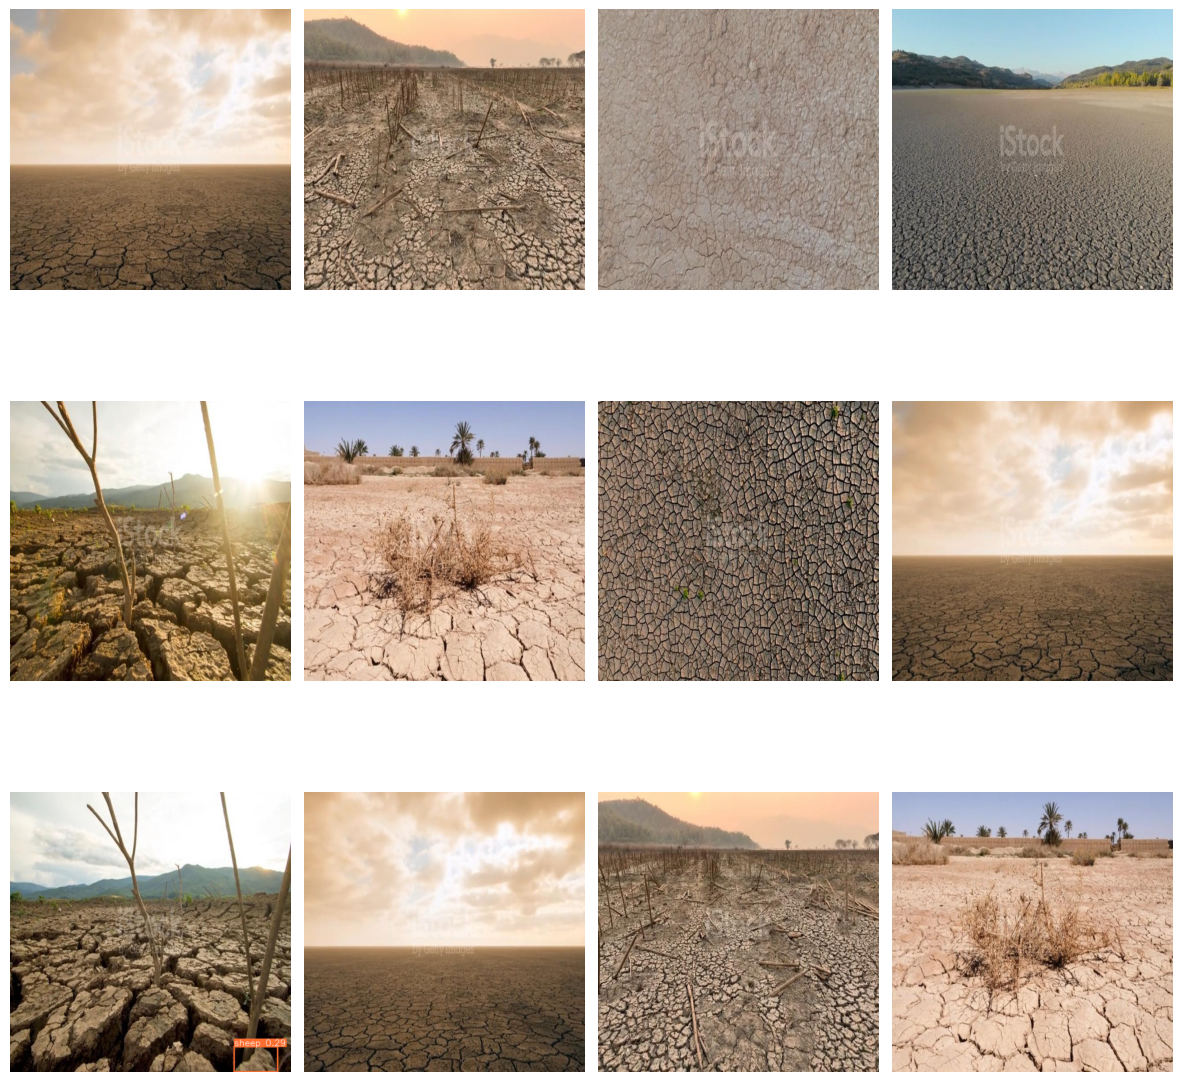

In [ ]:
# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    row_idx = i // 4
    col_idx = i % 4
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = desert_detect(img_path)
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

In [ ]:
model.train(data='/content/-desertification-4/data.yaml', epochs=5, batch=15, imgsz=640, save=True)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/-desertification-4/data.yaml, epochs=5, time=None, patience=100, batch=15, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 32.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 137MB/s]


AMP: checks passed ✅


train: Scanning /content/-desertification-4/train/labels... 844 images, 0 backgrounds, 0 corrupt: 100%|██████████| 844/844 [00:00<00:00, 1185.06it/s]

train: New cache created: /content/-desertification-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 192, len(boxes) = 844. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/-desertification-4/valid/labels... 241 images, 0 backgrounds, 0 corrupt: 100%|██████████| 241/241 [00:00<00:00, 423.97it/s]

val: New cache created: /content/-desertification-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 241. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       2.1G      1.934      1.901      2.164         11        640: 100%|██████████| 57/57 [00:23<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]

                   all        241        241      0.649      0.386      0.401      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.04G     0.5911      0.861      1.321         14        640: 100%|██████████| 57/57 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        241        241      0.917      0.988      0.962      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.04G     0.4053     0.6766      1.167         14        640: 100%|██████████| 57/57 [00:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]

                   all        241        241      0.991      0.992      0.989      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.13G     0.3272     0.5284       1.09         10        640: 100%|██████████| 57/57 [00:16<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]

                   all        241        241      0.984      0.991       0.99      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.05G     0.2683     0.4726      1.051         11        640: 100%|██████████| 57/57 [00:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]


                   all        241        241      0.991      0.992      0.991      0.948

5 epochs completed in 0.035 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.55it/s]


                   all        241        241      0.991      0.992      0.991      0.948
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79735d9adbd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.val()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/-desertification-4/valid/labels.cache... 241 images, 0 backgrounds, 0 corrupt: 100%|██████████| 241/241 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 241. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.49it/s]


                   all        241        241      0.991      0.992      0.991      0.947
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797345b926e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Defines a function desert_detect that takes an image path as input, loads the image, runs the YOLO model on it to detect objects, plots the detections on the image, converts it to RGB format, and returns the processed image.

* Defines the directory containing custom validation images.
* Lists all image files in that directory.
* Randomly selects 12 images for display.
* Creates a 3x4 grid of subplots to visualize the selected images.
* Loops through the selected images
* Displays each detected image in the corresponding subplot and turns off the axes for a cleaner look.
* Adjusts the spacing between the subplots for better visualization.


0: 640x640 (no detections), 28.2ms
Speed: 3.4ms preprocess, 28.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 11.0ms
Speed: 2.9ms preprocess, 11.0ms i

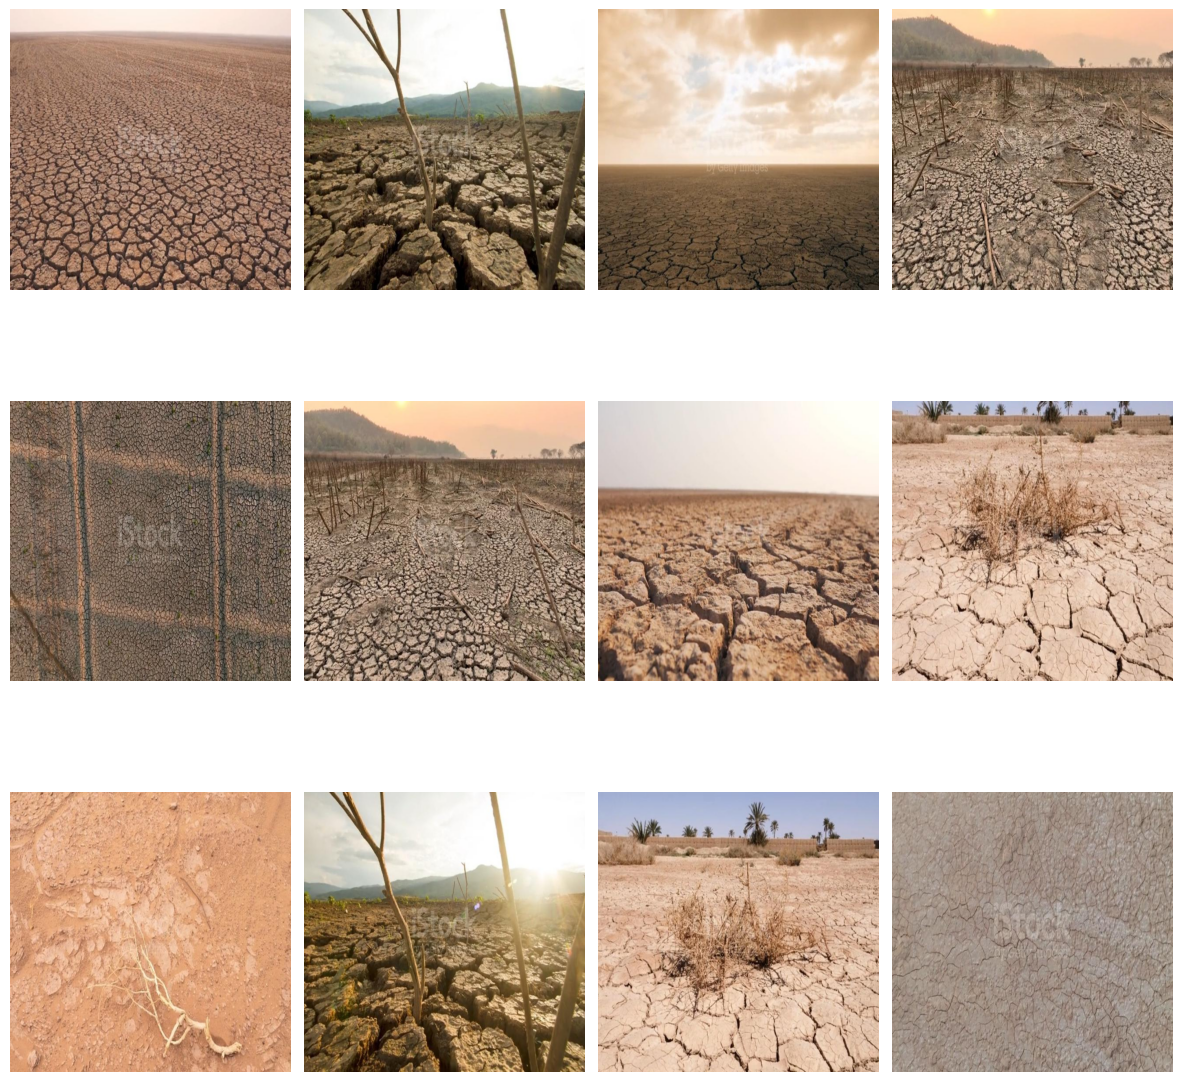

In [ ]:
# define the directory where the custom images are stored
custom_image_dir = '/content/-desertification-4/valid/images'

# get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# select 12 random images from the list
selected_images = random.sample(image_files, 12)

# create a figure with subplots for each image
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))

# iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = desert_detect(img_path)

     # plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


image 1/1 /content/-desertification-4/test/images/istockphoto-1477540421-640_adpp_is_mp4-0075_jpg.rf.60f7c1ffc1f09ce2f2dfc81acd30b6f1.jpg: 640x640 (no detections), 15.2ms
Speed: 2.2ms preprocess, 15.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


array([[[176, 218, 253],
        [176, 218, 253],
        [176, 218, 253],
        ...,
        [174, 207, 255],
        [174, 207, 255],
        [174, 207, 255]],

       [[176, 218, 253],
        [176, 218, 253],
        [176, 218, 253],
        ...,
        [174, 207, 255],
        [174, 207, 255],
        [174, 207, 255]],

       [[176, 218, 253],
        [176, 218, 253],
        [176, 218, 253],
        ...,
        [174, 207, 255],
        [174, 207, 255],
        [174, 207, 255]],

       ...,

       [[ 95, 118, 144],
        [ 85, 108, 134],
        [ 86, 110, 134],
        ...,
        [137, 157, 188],
        [146, 162, 191],
        [141, 157, 186]],

       [[104, 127, 153],
        [ 97, 120, 146],
        [ 96, 120, 144],
        ...,
        [133, 153, 184],
        [128, 144, 173],
        [112, 128, 157]],

       [[119, 142, 168],
        [108, 131, 157],
        [ 97, 121, 145],
        ...,
        [131, 151, 182],
        [114, 130, 159],
        [ 87, 103, 132]]], dtype=uint8)
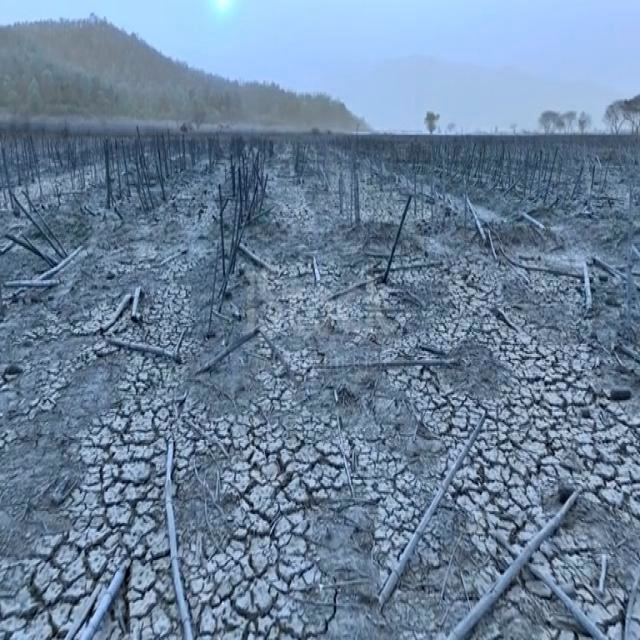

In [ ]:
# path for internal photo
internal_photo_path1 = '/content/-desertification-4/test/images/istockphoto-1477540421-640_adpp_is_mp4-0075_jpg.rf.60f7c1ffc1f09ce2f2dfc81acd30b6f1.jpg'

# load and predict
results = model(internal_photo_path1)

# visualize
results[0].plot()

In [ ]:
# # path for internal photo
# external_photo_path1 = ''

# # load and predict
# results = model(external_photo_path1)

# # visualize
# results[0].plot()

In [ ]:
# list the contents of the directory where the model weights should be
output_dir = '/content/runs/detect/train/weights'
print("Contents of the weights directory:", os.listdir(output_dir))

Contents of the weights directory: ['best.pt', 'last.pt']


The main loop processes each frame of the video, detecting objects using the YOLO model and drawing bounding boxes around them. Here’s a brief overview of the steps involved:

* Read Frame: Each frame is read sequentially from the video.
* Skip Frames: Every second frame is processed to reduce computational load.
* Detection: The YOLO model detects objects in the current frame.
* Bounding Boxes: Detected objects are marked with bounding boxes and labels indicating their class and confidence scores.
* Masks Processing: If available, masks are processed for additional analysis (like fire detection).
* Output Video: The processed frames can be written to an output video file.

# YOLO 8 Fine tunning


* sns.set_style('darkgrid'): Sets the style of seaborn plots to have a dark grid background for better visibility.
* %matplotlib inline: A magic command to display Matplotlib plots inline within a Jupyter notebook.

In [ ]:
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
# import suppresses warnings related to deprecated features, making the output cleaner
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

Loads a pre-trained YOLO model (version 8) from a specified file. This model can detect objects in images.

In [ ]:
# load the pre-trained YOLO model
model = YOLO('yolov8n.pt')

Connects to the Roboflow API using an API key, accesses a specific workspace and project, retrieves a specific version of the dataset, and downloads it in the YOLO format.

In [ ]:
rf = Roboflow(api_key="AV9dOXoKKeH8bfeebg1g")
project = rf.workspace("desertification").project("desertification")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Sets the path to the downloaded dataset
dataset_path = "/content/-desertification-4"

Listing all files in the dataset directory and prints them. This helps verify that the dataset has been downloaded correctly.

In [ ]:
# listing all files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['README.roboflow.txt', 'valid', 'README.dataset.txt', 'data.yaml', 'test', 'train']


This section checks for an annotations CSV file in the dataset path. If it exists, it reads the file into a DataFrame and prints the first few rows. This is useful for understanding the dataset's structure.

Lists the contents of the directories, checking if they exist first. This helps ensure that the dataset is organized correctly.

In [ ]:
# print("Contents of the train directory:", os.listdir(train_path) if os.path.exists(train_path) else "Train directory does not exist.")
# print("Contents of the test directory:", os.listdir(test_path) if os.path.exists(test_path) else "TEst directory does not exist.")
# print("Contents of the valid directory:", os.listdir(valid_path) if os.path.exists(valid_path) else "Validation directory does not exist.")

Seting paths for the images and labels of the training, testing, and validation datasets. The paths are used for loading images and their corresponding labels during processing

In [ ]:
train_images = os.path.join(dataset_path, 'train', 'images')
train_labels = os.path.join(dataset_path, 'train', 'labels')

test_images = os.path.join(dataset_path, 'test', 'images')
test_labels = os.path.join(dataset_path, 'test', 'labels')

valid_images = os.path.join(dataset_path, 'valid', 'images')
val_labels = os.path.join(dataset_path, 'valid', 'labels')

In [ ]:
# initializes counters to keep track of the number of images in the datasets
num_train_images = 0
num_test_images = 0
num_valid_images = 0

# initializes sets to store unique image dimensions for datasets
# This can be useful for analyzing the dataset's diversity in terms of image sizes
train_image_sizes = set()
test_image_sizes = set()
valid_image_sizes = set()


# iterates through the images directory, counts the number of JPEG images, and adds their dimensions to the each set

# train
for filename in os.listdir(train_images):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# test
for filename in os.listdir(test_images):
    if filename.endswith('.jpg'):
        num_test_images += 1
        image_path = os.path.join(test_images, filename)
        with Image.open(image_path) as img:
            test_image_sizes.add(img.size)

# validation
for filename in os.listdir(valid_images):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# print the total counts of images
print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")
print(f"Number of validation images: {num_valid_images}")


Number of training images: 844
Number of testing images: 120
Number of validation images: 241


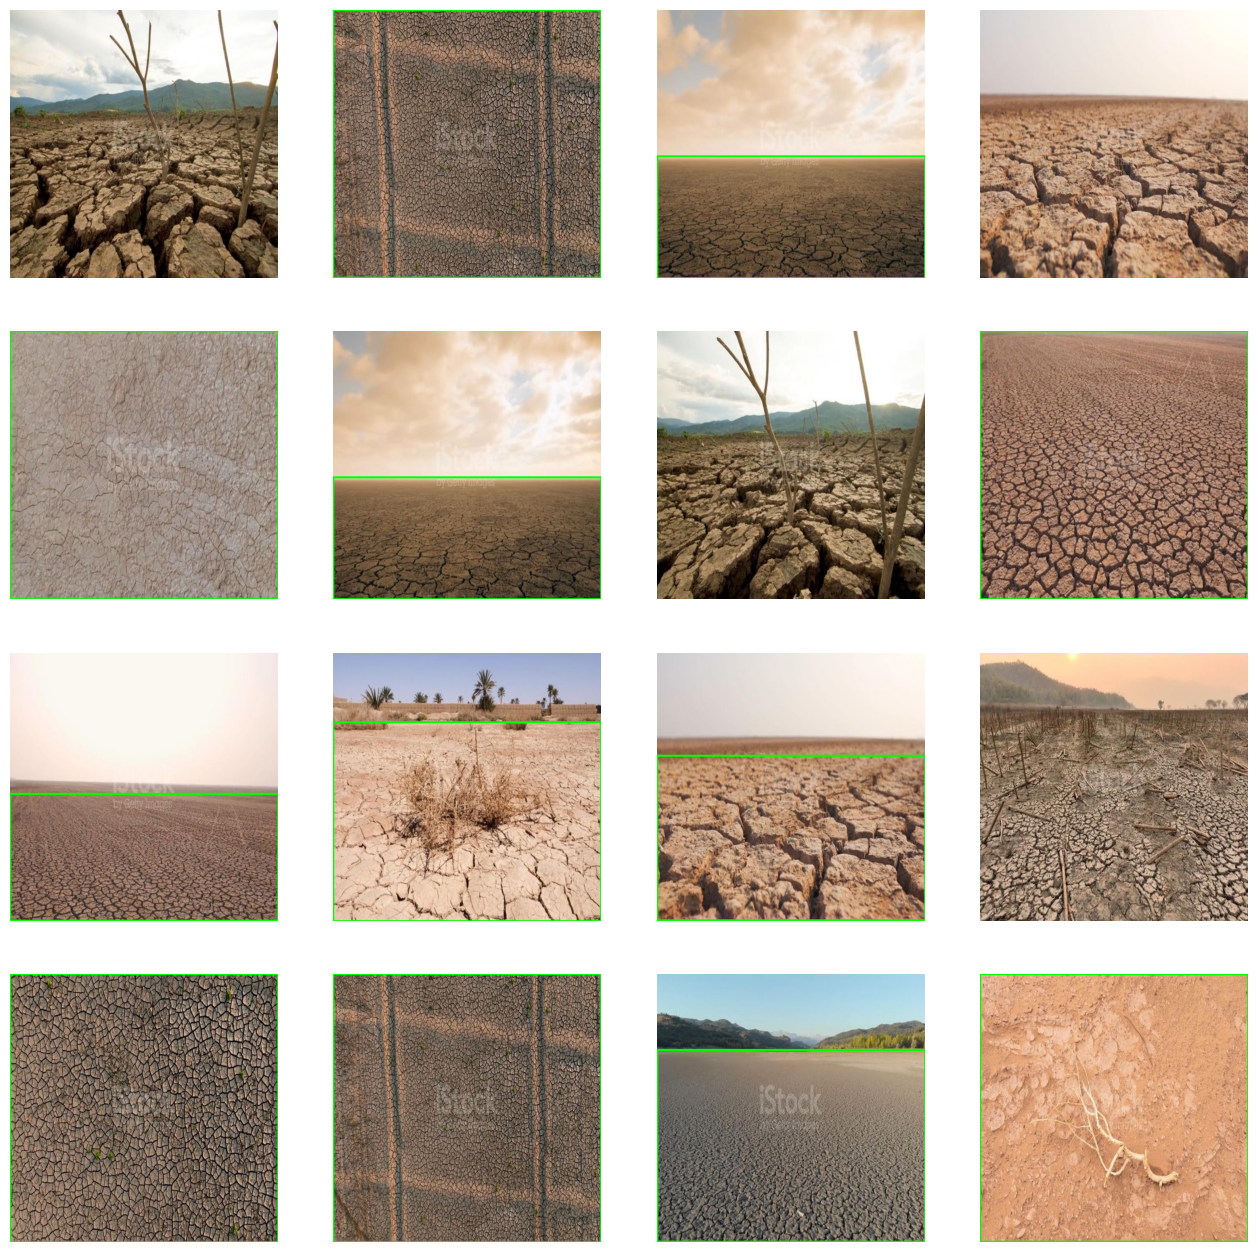

In [ ]:
# retrieves a list of all image files in the training images directory for further processing
image_files = os.listdir(train_images)

# randomly selects 16 images from the training set for visualization
# helping to inspect the dataset
random_images = random.sample(image_files, 16)

# creates a 4x4 grid of subplots to display the randomly selected images
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# loop through the randomly selected images
# calculating the row and column indices for the subplot grid
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # load each image using OpenCV
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # constructs the path to the corresponding label file, reads it, and splits the labels into a list
    # each label typically contains information about detected objects in the image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # for each label, it checks if it has the correct number of components (5).
    # if so, it extracts the class ID and bounding box parameters (center coordinates, width, height)
    # then converts them to pixel coordinates, and draws a rectangle around the detected object using OpenCV
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # converts the image from BGR to RGB format (since OpenCV uses BGR)
    # displays it in the appropriate subplot, and turns off the axis for a cleaner look
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

# renders the plots with the images and their detected objects
plt.show()

Load a specific image, resizes it to 512x512 pixels, checks if the image was loaded successfully, and prints its dimensions

In [ ]:
# # load an image using OpenCV
# image = cv2.imread("/content/Emergency-Response-3/train/images/041013autogas-1_jpg.rf.87e7b1cba2efaa07f4c512c67ce7ccec.jpg")
# image = cv2.resize(image, (512, 512))
# if image is None:
#     print(f"Failed to load image at path: {image_path}")
# else:
#     height, width, channels = image.shape
#     print(f"The image has dimensions {width}x{height} and {channels} channels.")


Trains the YOLO model using the specified dataset configuration file (data.yaml) for 15 epochs, with images resized to 640 pixels, setting a random seed for reproducibility, a batch size of 32, and using 4 worker threads for data loading.

In [ ]:
# New data to be added
new_data = {
    'test': '/content/-desertification-4/test',
    'train': '/content/-desertification-4/train',
    'val': '/content/-desertification-4/valid'
}

# YAML file path
yaml_file = '/content/-desertification-4/data.yaml'

# existing data
existing_data = {}

# Check if the file exists
if os.path.exists(yaml_file):
    # Read the existing data
    with open(yaml_file, 'r') as file:
        existing_data = yaml.safe_load(file) or {}

# Update the existing data with new data
existing_data.update(new_data)

# Write the updated data back to the YAML file
with open(yaml_file, 'w') as file:
    yaml.dump(existing_data, file, default_flow_style=False)

print("Data has been written to 'data.yaml'")


Data has been written to 'data.yaml'


In [ ]:
# training the model
model.train(data = yaml_file,
            epochs = 10,
            seed = 42,
            batch = 32,
            workers = 4)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/-desertification-4/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/-desertification-4/train/labels.cache... 844 images, 0 backgrounds, 0 corrupt: 100%|██████████| 844/844 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 192, len(boxes) = 844. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/-desertification-4/valid/labels.cache... 241 images, 0 backgrounds, 0 corrupt: 100%|██████████| 241/241 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 241. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.04G     0.6248      2.299      1.295         12        640: 100%|██████████| 27/27 [00:19<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        241        241      0.971      0.983      0.987      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.96G      0.272      1.021      1.068         12        640: 100%|██████████| 27/27 [00:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        241        241      0.753      0.855      0.855      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.96G     0.2684     0.8291      1.068         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        241        241      0.991      0.992      0.993      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.96G     0.2377     0.6883      1.034         12        640: 100%|██████████| 27/27 [00:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        241        241      0.962      0.979      0.987      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.96G     0.2329     0.5751      1.036         12        640: 100%|██████████| 27/27 [00:16<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        241        241      0.964      0.989       0.99      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.96G     0.2249     0.4885      1.015         12        640: 100%|██████████| 27/27 [00:16<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        241        241      0.992      0.984      0.993      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.96G     0.1987     0.4321      1.008         12        640: 100%|██████████| 27/27 [00:16<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        241        241       0.99      0.992      0.992      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.96G     0.2096     0.3986      1.017         12        640: 100%|██████████| 27/27 [00:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        241        241       0.99      0.979      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.96G     0.1786     0.3613     0.9869         12        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]

                   all        241        241      0.992      0.983      0.994      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.96G     0.1681      0.321     0.9941         12        640: 100%|██████████| 27/27 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]

                   all        241        241      0.991      0.992      0.994      0.967



10 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


                   all        241        241      0.991      0.992      0.994      0.967
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797345c8d8a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.save('detection_model.pt')

In [ ]:
# load cached label data from a NumPy file to ensure it is freshly accessed for further processing
data = np.load('/content/-desertification-4/train/labels.cache', allow_pickle=True).item()

# extracts the labels from the loaded data, which contain information about the images and their corresponding bounding boxes
labels = data['labels']

# iterates through each entry in the labels and appends relevant information to a list
# including image file names, shapes, classes, bounding boxes, normalization status, and bounding box format.
extracted_data = []

for entry in labels:
    extracted_data.append({
        'im_file': entry['im_file'],
        'shape': entry['shape'],
        'class': entry['cls'].flatten().tolist(),  # flattening in case there are multiple classes
        'bboxes': entry['bboxes'].tolist(),  # convert to list for easier handling
        'normalized': entry['normalized'],
        'bbox_format': entry['bbox_format']
    })

# converts the list of extracted data into a Pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(extracted_data)

# prints the first few rows of the DataFrame to check its structure and contents
print(df.head())

# Testing


In [ ]:
# load the best-trained YOLO model
model = YOLO('/content/detection_model.pt')

In [ ]:
# defines the path to the video file that will be analyzed.
video_path = '/content/droneV1.mp4'

# sets up parameters for text annotations that will be overlaid on video frames
# including font type, size, position, and colors
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
text_position = (40, 80)
font_color = (255, 255, 255)    # white color for text
background_color = (0, 0, 255)  # red background for text

# initializes a deque (double-ended queue) to keep track of the last 10 accident percentages
# which can be useful for smoothing or averaging
desert_deque = deque(maxlen=10)

# opens the video file for processing
cap = cv2.VideoCapture(video_path)

# checks if the video was opened successfully;
# if not, it prints an error message and exits the program
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# set up a video writer to save the processed video.
# define the codec for output video and retrieves the width and height of the frames from the input video
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
width = int(cap.get(3))
height = int(cap.get(4))
out = cv2.VideoWriter('model_video.mp4', fourcc, 20.0, (width, height))

# initializes a frame counter
frame_counter = 0

# initializes an empty set for class_id
# which will be used to track unique class IDs detected in the video frames
# class_id = set()
class_names = {0: "desertification", 1: "vegetation", 2: "city"}

# enters a loop to process video frames until the video ends
while cap.isOpened():
    ret, frame = cap.read()  # reads a frame from the video
    if not ret:
        print("Failed to read frame")  # if reading fails, it prints an error message and exits the loop
        break

    frame_counter += 1  # increments the frame counter for each processed frame

    # skip processing for every other frame to reduce computational load
    # effectively processing every second frame
    # if frame_counter % 2 != 0: # skip processing for every 2 frames
    #     continue  # skip to the next iteration of the loop

    # print a message indicating that a frame is being processed
    # which can help with debugging
    print("Processing frame...")

    # passes the current frame through the YOLO model to perform object detection, storing the results
    results = model(frame)

    # initializes a set to store detected vehicle IDs for the current frame
    current_class_id = set()
    class_id = set()

    # iterate through the detection results,
    # extracting bounding box coordinates, confidence scores, and class IDs for each detected object
    for result in results:
      for detection in result.boxes.data:  # Iterate through boxes
        x1, y1, x2, y2, conf, cls = detection.tolist()

        # applies a confidence threshold to filter out detections that are not sufficiently confident (below 0.7)
        # if the confidence is too low, it skips to the next detection.
        if conf < 0.5:
            continue

        # treats the class ID as a unique vehicle ID for tracking purposes
        vehicle_id = int(cls)

        # add the detected vehicle ID to the set for the current frame
        # allowing for tracking across frames
        current_class_id.add(vehicle_id)

        # draws a bounding box around the detected object on the current frame using OpenCV
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # format the label for the detected object based on its ID and confidence score
        label = f"{class_names[int(cls)]}, Conf: {conf:.2f}"

        # place the formatted label above the bounding box on the frame using OpenCV
        cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # update the overall set of class IDs with the IDs detected in the current frame
        # allowing for tracking across multiple frames
        class_id.update(current_class_id)

    # check if the detection results include masks (in case of segmentation tasks)
    # if masks are present, it initializes a total area counter and calculates the total area of the current frame
    # it then processes each mask to create a binary representation, where the mask is converted to a binary image
    if results and results[0].masks is not None:
        total_area = 0
        masks = results[0].masks.data.cpu().numpy()
        image_area = frame.shape[0] * frame.shape[1]
        for mask in masks:
            binary_mask = (mask > 0).astype(np.uint8) * 255   # Converts the mask into a binary format where the mask values greater than zero are set to 255 (white), and others are set to 0 (black)
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            if contours:  # ensure contours are found
                total_area += cv2.contourArea(contours[0])

        percentage_accident = (total_area / image_area) * 100
    else:
        percentage_accident = 0  # no masks found

    # write the processed frame to the output video
    out.write(frame)

    # showing the frame
    # cv2_imshow(frame)

    # breaking the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release() # releases the video capture object, freeing up resources
out.release() # closes the video writer object, ensuring that the output file is properly saved
cv2.destroyAllWindows() # is a cleanup function that closes all OpenCV windows

# display a message indicating completion
print("Video processing complete")

In [ ]:
results

In [ ]:
for result in results:
    boxes = result.boxes
    print(boxes)

# for class_id in boxes.cls:  # Iterate over the class IDs in boxes.cls
#     class_id = int(class_id)

# Location

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [ ]:

# Generate Random desertification Data
np.random.seed(42)
num_points = 500  # Number of data points

# Simulate coordinates around a central location (e.g., a city center)
latitudes = np.random.uniform(24.65, 24.75, num_points)
longitudes = np.random.uniform(46.65, 46.75, num_points)

# Simulate desertification density (scale 10 to 100)
desertification_density = np.random.uniform(10, 100, num_points)

# Simulate time of day (0 to 23 hours)
timestamps = np.random.randint(0, 24, num_points)

# Create DataFrame
desertification_data = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'desertification_density': desertification_density,
    'hour_of_day': timestamps
})

# Display first few rows
desertification_data.head()

In [ ]:
#Create a Folium Map

center_location = [desertification_data['latitude'].mean(), desertification_data['longitude'].mean()]
desertification_map = folium.Map(location=center_location, zoom_start=13)
#Add desertification Points to the Map

for idx, row in desertification_data.iterrows():
  folium.CircleMarker(location=(row['latitude'], row['longitude']), radius=row['desertification_density'] / 20, # Scale marker size
                      color='red' if row['desertification_density'] > 70 else 'green', fill=True, fill_opacity=0.6 ).add_to(traffic_map)
#Display the Map

desertification_map

# Image Captioning

In [ ]:
import cv2
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Paths and folder setup
video_path = '/content/model_video.mp4'  # Path to the input video
output_frames_folder = '/content/frames/'  # Path to save extracted frames
captions_file = 'video_captions.txt'  # File to save captions
video_description_file = 'video_description.txt'  # File to save final video description

In [ ]:
# Step 1: Create the folder to save frames if it doesn't exist
if not os.path.exists(output_frames_folder):
    os.makedirs(output_frames_folder)
    print(f"Folder created at {output_frames_folder}")
else:
    print(f"Folder already exists at {output_frames_folder}")

# Function to extract frames from video
def extract_frames(video_path, output_folder, frame_interval=30):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    success, image = cap.read()

    if not cap.isOpened():
        print("Error: Cannot open the video file.")
        return
    if not success:
        print(f"Error: Unable to read video file {video_path}")
        return

    print("Starting frame extraction...")
    while success:
        if frame_count % frame_interval == 0:  # Save every 'frame_interval' frames
            frame_name = f"frame_{frame_count}.jpg"
            frame_path = os.path.join(output_folder, frame_name)
            cv2.imwrite(frame_path, image)
            print(f"Frame saved at: {frame_path}")
        success, image = cap.read()
        frame_count += 1

    cap.release()
    print("Frame extraction completed.")

In [ ]:
# Step 2: Extract frames from the video
extract_frames(video_path, output_frames_folder)

# Check if frames are actually saved
if os.listdir(output_frames_folder):
    print(f"Frames successfully saved in {output_frames_folder}")
else:
    print(f"No frames were saved in {output_frames_folder}. Please check if the video path is correct and if frames were extracted.")

In [ ]:
# Step 3: Load BLIP model for real caption generation
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

In [ ]:
# Step 4: Generate captions for each frame using BLIP
captions = []
for frame in os.listdir(output_frames_folder):
    if frame.endswith(('.jpg', '.jpeg', '.png')):  # Check for image formats
        frame_path = os.path.join(output_frames_folder, frame)

        # Open the frame and process it for the captioning model
        image = Image.open(frame_path)
        inputs = processor(images=image, return_tensors="pt").to(device)

        # Generate the caption
        caption_ids = model.generate(**inputs)
        caption = processor.decode(caption_ids[0], skip_special_tokens=True)

        # Store the caption with the frame name
        captions.append(f"{frame}: {caption}")
        print(f"Generated caption for {frame}: {caption}")

# Save captions to a text file
with open(captions_file, 'w') as f:
    for caption in captions:
        f.write(caption + '\n')
print(f"Captions saved to {captions_file}")

In [ ]:
# Step 5: Generate a single-line video description based on all captions
# Collect unique captions in a set
unique_captions = set()

for caption in captions:
    description = caption.split(": ")[1]
    unique_captions.add(description)

# Join the unique captions with commas
video_description = "This video depicts: " + ', '.join(unique_captions)

# Save the video description to a text file
with open(video_description_file, 'w') as f:
    f.write(f"Video Description: {video_description}\n")
print(f"Video description saved to {video_description_file}")

# Check the contents of the description file
with open(video_description_file, 'r') as f:
    description = f.read()
print(description)


# LLM

In [ ]:
class_counts = {}

detections = {}

for result in results:
    if result.boxes.cls is not None:  # Check if any objects were detected
        for *xyxy, conf, cls in result.boxes.data.tolist():  # Iterate through detected objects
            class_id = int(cls)
            class_name = class_names.get(class_id)

            # Counting classes if confidence >= 0.25
            if class_name in [] and conf >= 0.25:
                class_counts[class_name] += 1

            # Set flags to True if classes are detected
            if class_name == 'desertification' and conf >= 0.25:
                detections['desertification'] = True
            elif class_name == '' and conf >= 0.25:
                detections[''] = True
            elif class_name == '' and conf >= 0.25:
                detections[''] = True

# Print out the count
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Print the detection status
print("\nDetection Status:")
for detection, status in detections.items():
    print(f"{detection}: {'Detected' if status else 'Not Detected'}")


In [ ]:
!pip install langchain

In [ ]:
! pip install langchain_community unstructured sentence_transformers tiktoken chromadb langchain_chroma langchain_groq

In [ ]:
# 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
# class_names = {0: "desertification"}

In [ ]:
# dictionary to store the YOLO output including class counts and detections
yolo_output = {}

# assign class_counts to yolo_output
yolo_output['class_counts'] = class_counts

# assign detection flags to yolo_output
yolo_output['detections'] = detections

# Print the YOLO output to verify
print("YOLO Output:")
print(yolo_output)


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_groq import ChatGroq
#from langchain.llms import OpenAI

# Define the prompt template for generating the report
prompt_template = f"""
You are a desertification reporter in the control and command center. Instead of following the drone by yourself, the YOLO model detected desertification with the following information:

- Caption: {description}
- YOLO Output:
  - Desertification: {yolo_output['class_counts']['desertification']}

Based on this information, generate a detailed report describing the situation of the desertification:

1. If there is desertification
2. The status of the desertification
3. The density of the desertification
4. The location of the desertification
"""

#llama3-8b-8192
# groq/llama-3.1-70b-versatile
# Setup the prompt and LLM chain
groq_api_key = "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"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name="llama3-8b-8192")
prompt = PromptTemplate(template=prompt_template, input_variables=["desertification"])
chain = LLMChain(llm=llm, prompt=prompt)

# Example of YOLO output as input for the chain
report = chain.run(yolo_output)
print(report)


In [ ]:
import os

# Save the API key
os.environ["GROQ_API_KEY"] = "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"

In [ ]:
from langchain_groq import ChatGroq

# Create the LLM for writing and editing
llm = ChatGroq(
    model="groq/llama-3.1-70b-versatile",
    temperature=0.7,  # Adjusts creativity
    max_tokens=None,
    timeout=None,
    max_retries=2
)
